# DỰ ĐOÁN GIÁ XE

# Import library

link website: https://bonbanh.com/

In [152]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Crawling data from website 

In [153]:
# chỗ này nhớ bật mạng lên !
link_base = "https://bonbanh.com/oto/page,"
list_link = []

with open("craw_data.csv", "w", encoding='utf_8') as file:
    file.write("Id,Year,New Or Old,Name,Address,Production Origin,Color,Fuel,Car Gearbox,Used (kilomet),Price\n")
    for index in range(1,500):
        item = link_base + str(index)
        list_link.append(item)

    # kiểm tra xem bạn có phải là robot không
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    data = []
    for i in range(len(list_link)):

        link = list_link[i]
        # sau khi đã có link thì mình sẽ requests về cái trang web đó   
        response = requests.get(link, headers=headers) 
        soup = BeautifulSoup(response.text, 'html.parser')       
        data = soup.find('div', attrs={'class':'g-box-content'}).find_all('a', attrs={'itemprop':'url'})
        #lấy thông tin 
        for j in range(1,20):
            try:
                new_or_old = data[j].find_all('div')[0].text[:-5]

                year = data[j].find_all('div')[0].text[-5:] 
            
                name = data[j].find_all('div')[1].text[:-6]

                price = data[j].find_all('div')[2].text

                address = data[j].find_all('div')[3].text

                id = data[j].find_all('div')[4].text[6:]

                production_origin = data[j].find_all('div')[5].text.split('...')[0][2:].split(', ')[0]

                color = data[j].find_all('div')[5].text.split('...')[0][2:].split(', ')[1]

                fuel = data[j].find_all('div')[5].text.split('...')[0][2:].split(', ')[2]

                car_gearbox = data[j].find_all('div')[5].text.split('...')[0][2:].split(', ')[3]

                if(data[j].find_all('div')[0].text[:-5].strip() == 'Xe cũ'):

                    used = data[j].find_all('div')[5].text.split('...')[0][2:].split(', ')[4].replace(',','').split(' ')[2]
                else:
                    used = "0"
            except:
                break
            srt1 = f"{str(id.strip())},{str(year.strip())},{str(new_or_old.strip())},\"{str(name.strip())}\",{str(address.strip())},{str(production_origin.strip())},{str(color.strip())},\"{str(fuel.strip())}\",{str(car_gearbox.strip())},{str(used.strip())},{str(price.strip())}\n"
            file.write(srt1)
file.close()



# Read file

In [154]:


df = pd.read_csv('craw_data.csv',sep=',', engine='python',encoding='utf_8')
df.head()


,Id,Year,New Or Old,Name,Address,Production Origin,Color,Fuel,Car Gearbox,Used (kilomet),Price
0,4553462,2015,Xe cũ,Mazda 6 2.5 AT,Hà Nội,Xe lắp ráp trong nước,màu đỏ,máy xăng 2.5 L,số tự động,60000,520 Triệu
1,4789838,2019,Xe cũ,Mercedes Benz S class S450L,TP HCM,Xe lắp ráp trong nước,màu đỏ,máy xăng 3.0 L,số tự động,15000,3 Tỷ 299 Triệu
2,4729199,2022,Xe mới,VinFast VF8 Plus,TP HCM,Xe lắp ráp trong nước,màu cam,xe điện,số tự động,0,887 Triệu
3,4838739,2018,Xe cũ,Honda City 1.5TOP,Đồng Tháp,Xe lắp ráp trong nước,màu trắng,máy xăng 1.5 L,số tự động,73000,418 Triệu
4,4814200,2006,Xe cũ,Ford Everest 2.5L 4x2 MT,Đồng Tháp,Xe lắp ráp trong nước,màu bạc,máy dầu 2.5 L,số tay,138000,198 Triệu


In [155]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 4279 non-null   int64 
 1   Year               4279 non-null   int64 
 2   New Or Old         4279 non-null   object
 3   Name               4279 non-null   object
 4   Address            4279 non-null   object
 5   Production Origin  4279 non-null   object
 6   Color              4279 non-null   object
 7   Fuel               4279 non-null   object
 8   Car Gearbox        4279 non-null   object
 9   Used (kilomet)     4279 non-null   int64 
 10  Price              4279 non-null   object
dtypes: int64(3), object(8)
memory usage: 367.9+ KB


In [156]:
df.describe()

,Id,Year,Used (kilomet)
count,4.279000e+03,4279.000000,4.279000e+03
mean,4.634185e+06,2019.004440,5.054223e+04
std,3.828227e+05,4.104266,8.163900e+05
min,2.366600e+04,1990.000000,0.000000e+00
25%,4.615988e+06,2017.000000,0.000000e+00
50%,4.757112e+06,2020.000000,2.000000e+04
75%,4.822248e+06,2022.000000,5.500000e+04
max,4.840475e+06,2023.000000,5.000000e+07


# DATA PROCESSING

# Làm sạch dữ liệu (Data cleaning)

In [157]:
print(set(df['Fuel']))

{'máy xăng 5.0 L', 'máy xăng 6.7 L', 'máy dầu 3.0 L', 'máy xăng 2.0 L', 'máy xăng 6.0 L', 'máy dầu 3.9 L', 'máy xăng 3.0 L', 'máy xăng 2.4 L', 'máy dầu 1.9 L', 'máy xăng 5.6 L', 'máy xăng 1.8 L', 'xe hybrid 3.5 L', 'máy xăng 3.4 L', 'máy xăng 6.2 L', 'máy xăng 6.5 L', 'máy xăng 4.6 L', 'máy dầu 2.1 L', 'máy dầu 12.3 L', 'máy xăng 5.2 L', 'máy xăng 1.4 L', 'máy dầu 3.2 L', 'máy xăng 3.6 L', 'máy xăng 1.0 L', 'máy xăng 4.5 L', 'máy xăng 2.6 L', 'xe hybrid 1.8 L', 'xe hybrid 1.2 L', 'máy xăng 6.6 L', 'xe hybrid 2.5 L', 'máy dầu 2.8 L', 'máy dầu 1.7 L', 'máy xăng 5.4 L', 'máy dầu 2.0 L', 'máy xăng 2.9 L', 'xe hybrid 1.5 L', 'máy dầu 2.3 L', 'máy xăng 6.8 L', 'máy xăng 2.7 L', 'máy xăng 2.3 L', 'máy xăng 4.8 L', 'máy xăng 1.6 L', 'máy xăng 1.25 L', 'máy xăng 5.7 L', 'máy xăng 3.8 L', 'máy xăng 1.3 L', 'máy dầu 2.2 L', 'máy xăng 4.7 L', 'xe hybrid 2.0 L', 'máy xăng 1.2 L', 'xe hybrid', 'máy dầu 2.5 L', 'máy xăng 3.7 L', 'máy xăng 1.1 L', 'máy xăng 2.5 L', 'xe điện', 'xe hybrid 5.0 L', 'máy x

Kiểm tra len(df['Fuel'][i].split(' ')[:])

In [158]:
list_check = []
for i in range (df.shape[0]):
    list_check.append((len(df['Fuel'][i].split(' ')[:])))

print(set(list_check))

{2, 4}


Có nhiều dữ liệu khác nhau có thể được mở rộng từ các cột hiện tại, nên ta sẽ mở rộng chúng

In [159]:
for i in range(df.shape[0]):
    #tách company từ cột Name
    df.at[i, 'Company'] = df['Name'][i].split(' ')[0]

    #tách Fuel Type và Machine Capacity (L)
    df.at[i, 'Fuel Type'] = df['Fuel'][i].split(' ')[0] + ' ' + df['Fuel'][i].split(' ')[1]
    if(len(df['Fuel'][i].split(' ')[:]) == 4):
        df.at[i, 'Machine Capacity (L)'] = df['Fuel'][i].split(' ')[2]
    elif(len(df['Fuel'][i].split(' ')[:]) == 2):
        df.at[i, 'Machine Capacity (L)'] = None
    


In [160]:
# convert
df['Machine Capacity (L)'] = df['Machine Capacity (L)'].astype(float)

In [161]:
print(set(df['Machine Capacity (L)']))

{1.5, 2.5, 3.0, 2.2, 2.0, 3.3, 2.7, 5.6, 3.2, 4.0, 1.0, 1.25, 4.5, 5.0, 6.0, 3.5, 12.3, 6.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.6, 6.6, 0.8, 1.8, 1.3, 3.7, 4.7, 4.2, 5.7, 5.2, 6.2, 6.7, 1.4, 1.6, 2.4, 1.9, 2.9, 3.4, 3.9, 1.1, 2.6, 2.1, 3.6, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2.3, 2.8, 3.8, nan, 4.8, 6.8, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.2, 1.7, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

# Xử lý dữ liệu trống (missing data)

In [162]:
df.isnull().sum()

Id                        0
Year                      0
New Or Old                0
Name                      0
Address                   0
Production Origin         0
Color                     0
Fuel                      0
Car Gearbox               0
Used (kilomet)            0
Price                     0
Company                   0
Fuel Type                 0
Machine Capacity (L)    340
dtype: int64

Xử lý dữ liệu trống bằng phương pháp thay thế bằng giá trị ngẫu nhiên
- Kỹ thuật này cũng giả định rằng dữ liệu trống hoàn toàn ngẫu nhiên
- Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột tương ứng
- Dùng hàm dropna() của đối tượng DataFrame để bỏ qua các NaN values

In [163]:
# xử lý các NaN trong cột Machine Capacity (L)
df['Machine Capacity (L)'].isnull().sum()
# lấy ngẫu nhiên từ cột Machine Capacity (L) một giá trị khác NaN,
# kết quả sẽ ko lặp lại sau mỗi lần thực hiện lệnh
df['Machine Capacity (L)'].dropna().sample()

2415    3.0
Name: Machine Capacity (L), dtype: float64

In [164]:
random_samples = df['Machine Capacity (L)'].dropna().sample(n=df['Machine Capacity (L)'].isnull()
.sum(),random_state=0)
random_samples

1425    2.0
1672    5.0
3556    1.5
2412    3.5
2388    2.0
       ... 
4126    2.2
998     3.5
3242    3.4
3597    1.5
525     2.5
Name: Machine Capacity (L), Length: 340, dtype: float64

Chỉ số của các hàng bị trống dữ liệu 

In [165]:
df[df['Machine Capacity (L)'].isnull()].index

Int64Index([   2,   16,   17,   25,   26,   57,   60,   79,   85,   86,
            ...
            4049, 4090, 4144, 4158, 4169, 4184, 4220, 4249, 4260, 4262],
           dtype='int64', length=340)

Gán lại index cho series ngẫu nhiên vừa tạo

In [166]:
random_samples.index = df[df['Machine Capacity (L)'].isnull()].index

Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột

In [167]:
df['Machine Capacity (L) Random']=df['Machine Capacity (L)']
df.loc[df['Machine Capacity (L)'].isnull(), 'Machine Capacity (L) Random']=random_samples
df.tail()

,Id,Year,New Or Old,Name,Address,Production Origin,Color,Fuel,Car Gearbox,Used (kilomet),Price,Company,Fuel Type,Machine Capacity (L),Machine Capacity (L) Random
4274,4629930,2018,Xe cũ,Honda Jazz RS,Hà Nội,Xe nhập khẩu,màu đỏ,máy xăng 1.5 L,số tự động,60000,465 Triệu,Honda,máy xăng,1.5,1.5
4275,4625221,2021,Xe cũ,Peugeot 3008 AL,Hà Nội,Xe lắp ráp trong nước,màu trắng,máy xăng 1.6 L,số tự động,4000,1 Tỷ 79 Triệu,Peugeot,máy xăng,1.6,1.6
4276,4836923,2017,Xe cũ,Mitsubishi Triton 4x2 AT,Hà Nội,Xe nhập khẩu,màu xám,máy dầu 2.5 L,số tự động,190000,450 Triệu,Mitsubishi,máy dầu,2.5,2.5
4277,4710255,2011,Xe cũ,Toyota Camry LE 2.5,Hà Nội,Xe nhập khẩu,màu trắng,máy xăng 2.5 L,số tự động,90000,610 Triệu,Toyota,máy xăng,2.5,2.5
4278,4828308,2019,Xe cũ,Nissan Navara EL Premium R,Hà Nội,Xe nhập khẩu,màu xanh,máy dầu 2.5 L,số tự động,50000,540 Triệu,Nissan,máy dầu,2.5,2.5


Vẽ hàm mật độ xác suất của cột Machine Capacity (L) trước và sau khi điền

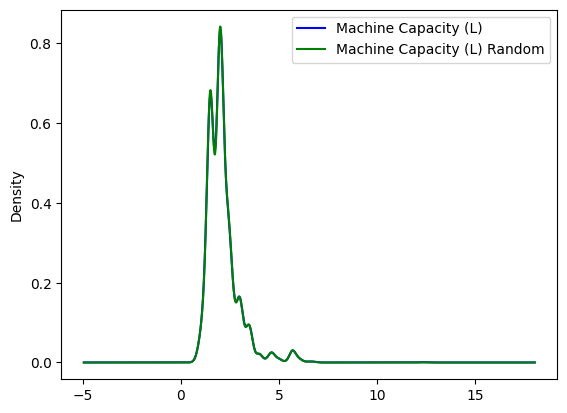

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Machine Capacity (L)'].plot(kind='kde', ax=ax, color='blue')
df['Machine Capacity (L) Random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Xóa các cột ban đầu mà không ảnh hưởng

In [169]:
df.drop(["Name"],axis=1,inplace=True)
df.drop(["Id"],axis=1,inplace=True)
df.drop(["Fuel"],axis=1,inplace=True)
df.drop(["Machine Capacity (L)"],axis=1,inplace=True)

Chuyển cột 'Price' về cuối df

Chuyển cột 'Price' về cuối df

In [170]:
moving_column = df.pop('Price')
df.insert(10,'Price',moving_column)

In [171]:
df.head()

,Year,New Or Old,Address,Production Origin,Color,Car Gearbox,Used (kilomet),Company,Fuel Type,Machine Capacity (L) Random,Price
0,2015,Xe cũ,Hà Nội,Xe lắp ráp trong nước,màu đỏ,số tự động,60000,Mazda,máy xăng,2.5,520 Triệu
1,2019,Xe cũ,TP HCM,Xe lắp ráp trong nước,màu đỏ,số tự động,15000,Mercedes,máy xăng,3.0,3 Tỷ 299 Triệu
2,2022,Xe mới,TP HCM,Xe lắp ráp trong nước,màu cam,số tự động,0,VinFast,xe điện,2.0,887 Triệu
3,2018,Xe cũ,Đồng Tháp,Xe lắp ráp trong nước,màu trắng,số tự động,73000,Honda,máy xăng,1.5,418 Triệu
4,2006,Xe cũ,Đồng Tháp,Xe lắp ráp trong nước,màu bạc,số tay,138000,Ford,máy dầu,2.5,198 Triệu


# Feature Engineering

Encoding for 'Price' column

In [172]:
for i in range (df.shape[0]):
    result = 0.0
    list_temp = df['Price'][i].split(' ')[:]

    for j in range(len(list_temp)):
        
        if(list_temp[j] == 'Tỷ'): # 4 Tỷ 359 Triệu , 688 Triệu	
            base1 = 1000000000.0
            temp_result = pd.to_numeric(list_temp[j-1], downcast='integer') * base1
            result = result + temp_result
        if (list_temp[j] == 'Triệu'):
            base2 = 1000000.0
            temp_result = pd.to_numeric(list_temp[j-1], downcast='integer') * base2
            result = result + temp_result
    
    df.at[i, 'Price'] = result

df['Price'] = pd.to_numeric(df['Price'], downcast='float')

In [173]:
df.head()

,Year,New Or Old,Address,Production Origin,Color,Car Gearbox,Used (kilomet),Company,Fuel Type,Machine Capacity (L) Random,Price
0,2015,Xe cũ,Hà Nội,Xe lắp ráp trong nước,màu đỏ,số tự động,60000,Mazda,máy xăng,2.5,5.200000e+08
1,2019,Xe cũ,TP HCM,Xe lắp ráp trong nước,màu đỏ,số tự động,15000,Mercedes,máy xăng,3.0,3.299000e+09
2,2022,Xe mới,TP HCM,Xe lắp ráp trong nước,màu cam,số tự động,0,VinFast,xe điện,2.0,8.870000e+08
3,2018,Xe cũ,Đồng Tháp,Xe lắp ráp trong nước,màu trắng,số tự động,73000,Honda,máy xăng,1.5,4.180000e+08
4,2006,Xe cũ,Đồng Tháp,Xe lắp ráp trong nước,màu bạc,số tay,138000,Ford,máy dầu,2.5,1.980000e+08


Data Visualization

Trực quan sự phân bố giá trị của cột 'Price'

C:\Users\dongu\AppData\Local\Temp\ipykernel_8072\2121021245.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


(63000000.0, 41990000000.0)

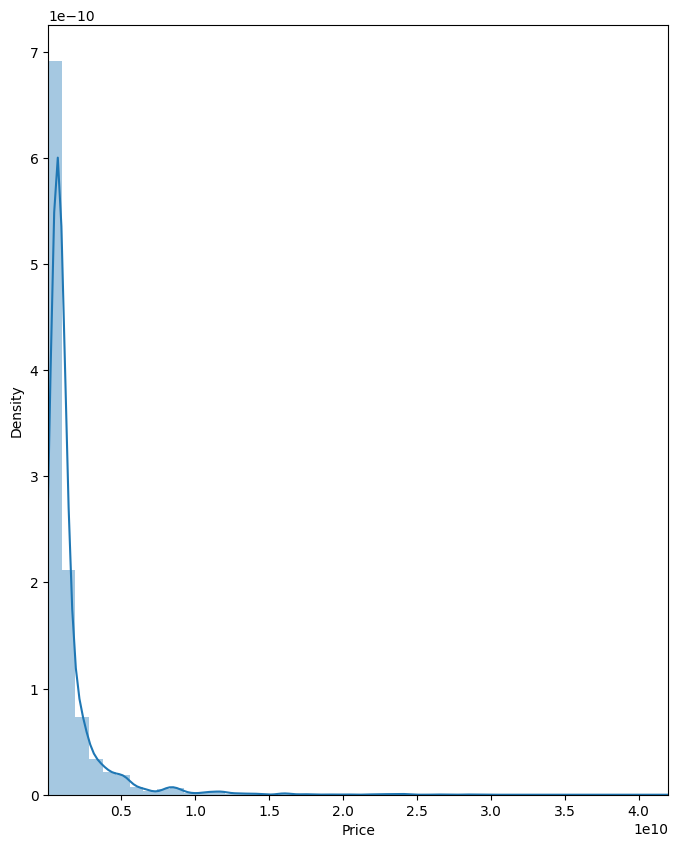

In [174]:
f, ax = plt.subplots(figsize=(8,10))
sns.distplot(df['Price'])
plt.xlim([6.300000e+07,4.199000e+10])

# Year

groupby giá trị của cột 'Price' theo 'Year' 

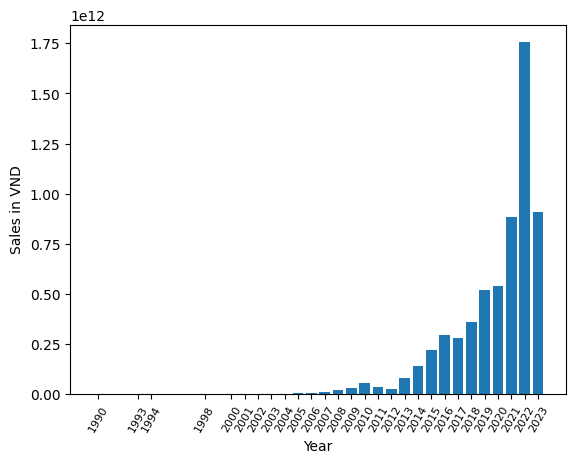

In [175]:
sales_value = df.groupby('Year').sum()['Price']
years = list(set(df['Year']))
plt.bar(x=years, height=sales_value)
plt.xticks(years, rotation= 60, size=8)
plt.xlabel('Year')
plt.ylabel('Sales in VND')
plt.show()

Điều ở trên chưa chính xác khi mà có thể có các loại xe có giá trị đắt đỏ. 

# New Or Old

In [176]:
print(set(df['New Or Old']))

{'Xe mới', 'Xe cũ', 'Xe cũ <'}


In [177]:
for i in range(df.shape[0]):
    if(df['New Or Old'][i] == 'Xe cũ <'):
        df['New Or Old'][i] = df['New Or Old'][i].replace('Xe cũ <', 'Xe cũ')

C:\Users\dongu\AppData\Local\Temp\ipykernel_8072\3490621823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Or Old'][i] = df['New Or Old'][i].replace('Xe cũ <', 'Xe cũ')


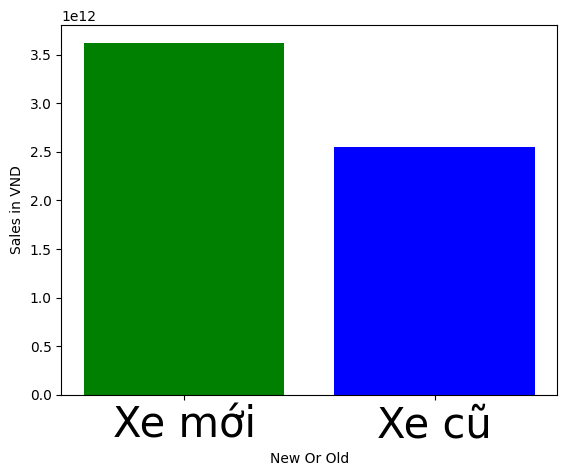

In [178]:
sales_value = df.groupby('New Or Old').sum()['Price']
New_Or_Old = list(set(df['New Or Old']))
plt.bar(x=New_Or_Old, height=sales_value,color=['g','b'])
plt.xticks(New_Or_Old, rotation= 0, size=30)
plt.xlabel('New Or Old')
plt.ylabel('Sales in VND')
plt.show()

# Address

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'Hà Nội'),
  Text(1, 0, 'TP HCM'),
  Text(2, 0, 'Đồng Tháp'),
  Text(3, 0, 'Bà Rịa Vũng Tàu'),
  Text(4, 0, 'Thái Bình'),
  Text(5, 0, 'Phú Thọ'),
  Text(6, 0, 'Hưng Yên'),
  Text(7, 0, 'Thanh Hóa'),
  Text(8, 0, 'Vĩnh Phúc'),
  Text(9, 0, 'Quảng Ninh'),
  Text(10, 0, 'Lâm Đồng'),
  Text(11, 0, 'Thái Nguyên'),
  Text(12, 0, 'Khánh Hòa'),
  Text(13, 0, 'Hải Phòng'),
  Text(14, 0, 'Bình Dương'),
  Text(15, 0, 'Nghệ An'),
  Text(16, 0, 'Nam Định'),
  Text(17, 0, 'Đồng Nai'),
  Text(18, 0, 'Ninh Bình'),
  Text(19, 0, 'Hải Dương'),
  Text(20, 0, 'Quảng Ngãi'),
  Text(21, 0, 'Quảng Nam'),
  Text(22, 0, 'Bắc Ninh'),
  Text(23, 0, 'Hậu Giang'),
  Text(24, 0, 'Long An'),
  Text(25, 0, 'Cần Thơ'),
  Text(26, 0, 'Sóc Trăng'),
  Text(27, 0, 'Bình Định'),
  Text(28, 0, 'Hà Na

<Figure size 2000x1000 with 0 Axes>

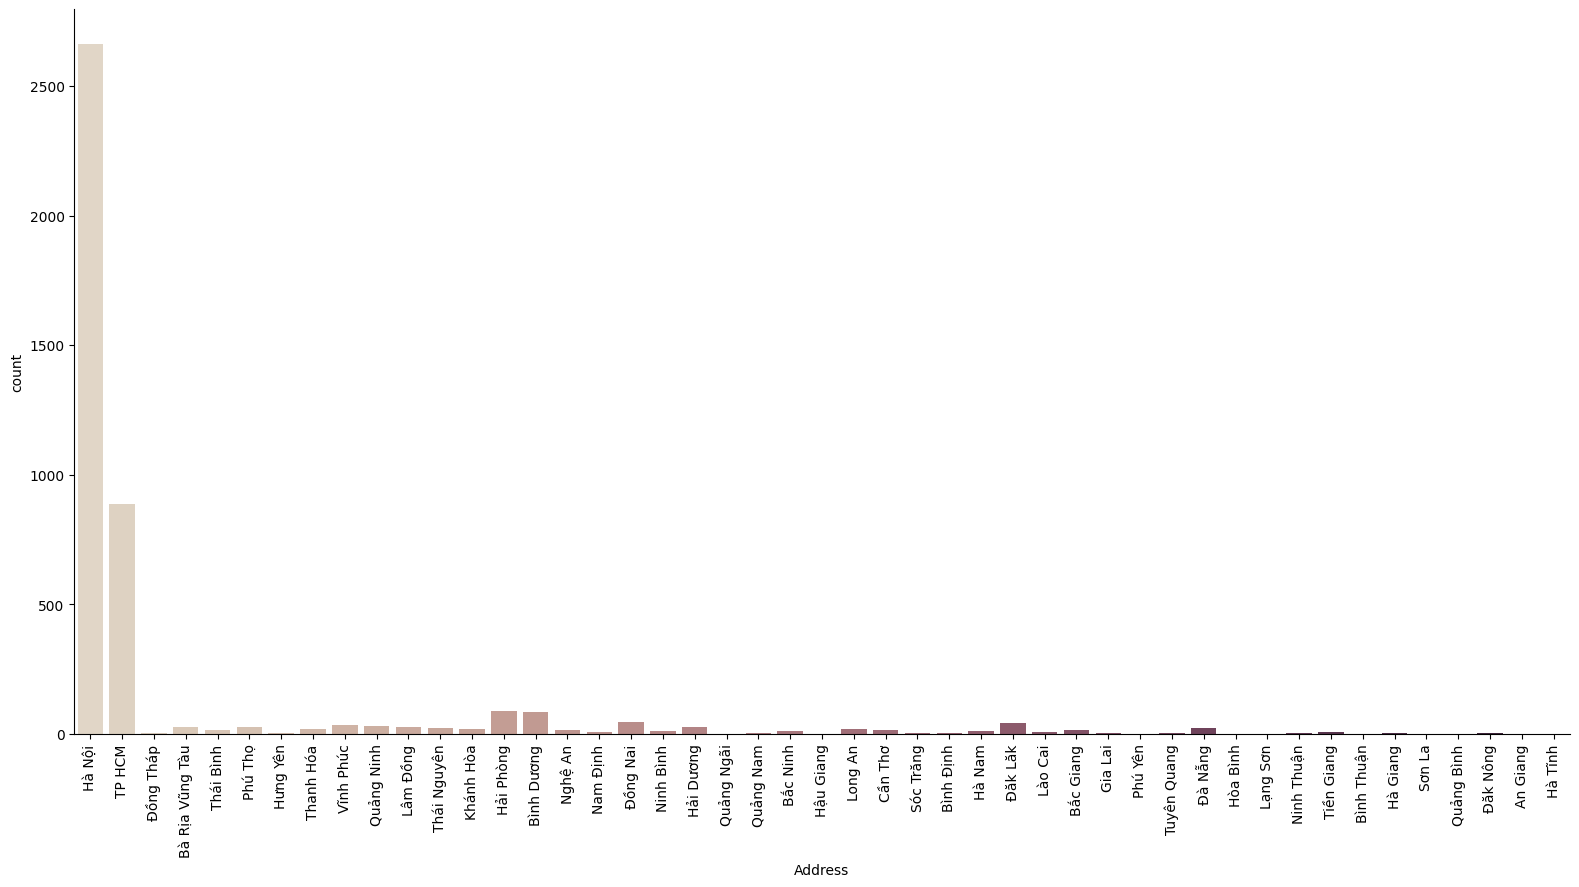

In [179]:
var = "Address"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df)
plt.xticks(rotation=90)

# Production Origin

In [180]:
print(set(df['Production Origin']))

{'Xe lắp ráp trong nước', 'Xe nhập khẩu'}


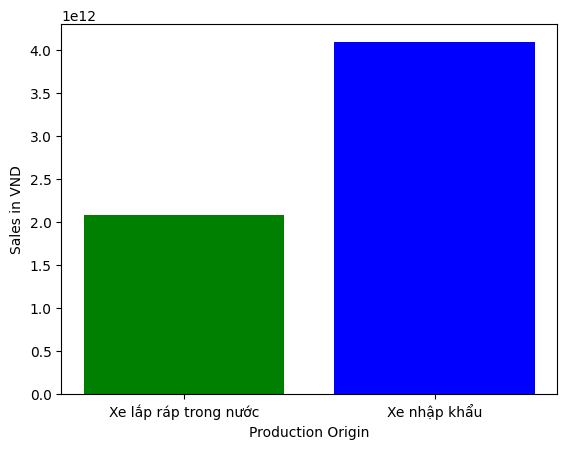

In [181]:
sales_value = df.groupby('Production Origin').sum()['Price']
Production_Origin = list(set(df['Production Origin']))
plt.bar(x=Production_Origin, height=sales_value,color=['g','b'])
plt.xticks(Production_Origin, rotation= 0, size=10)
plt.xlabel('Production Origin')
plt.ylabel('Sales in VND')
plt.show()

# Color

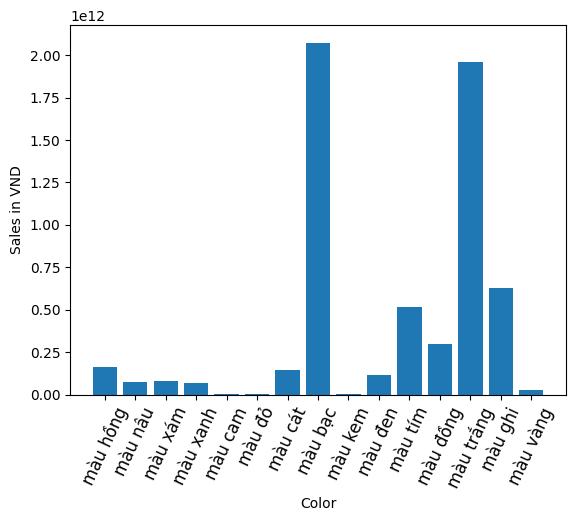

In [182]:
sales_value = df.groupby('Color').sum()['Price']
years = list(set(df['Color']))
plt.bar(x=years, height=sales_value)
plt.xticks(years, rotation= 65, size=12)
plt.xlabel('Color')
plt.ylabel('Sales in VND')
plt.show()

# Car Gearbox

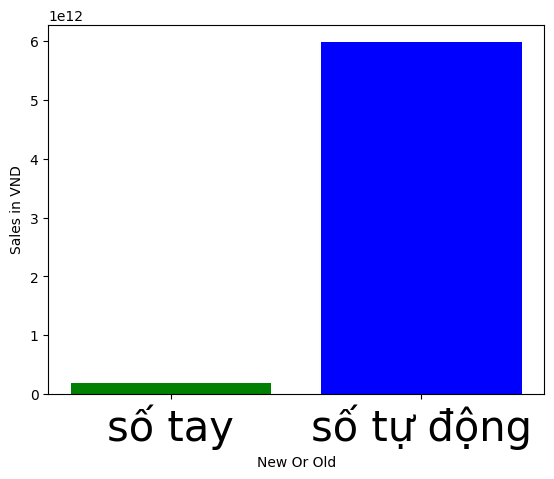

In [183]:
sales_value = df.groupby('Car Gearbox').sum()['Price']
Car_Gearbox = list(set(df['Car Gearbox']))
plt.bar(x=Car_Gearbox, height=sales_value,color=['g','b'])
plt.xticks(Car_Gearbox, rotation= 0, size=30)
plt.xlabel('New Or Old')
plt.ylabel('Sales in VND')
plt.show()

# Company

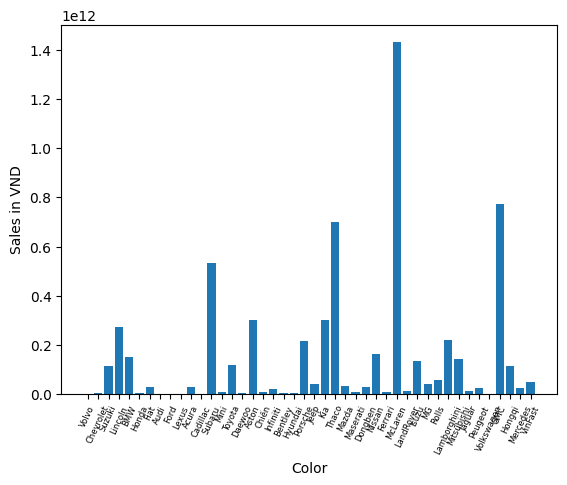

In [184]:
sales_value = df.groupby('Company').sum()['Price']
Company = list(set(df['Company']))
plt.bar(x=Company, height=sales_value)
plt.xticks(Company, rotation= 65, size=6)
plt.xlabel('Color')
plt.ylabel('Sales in VND')
plt.show()

In [185]:
#Year	New Or Old	Address	Production Origin	Color	Car Gearbox	Used (kilomet)	Company	Fuel Type	Machine Capacity (L) Random	Price

Text(0.5, 1.0, 'Giá bán tương ứng theo số kilomet đã chạy')

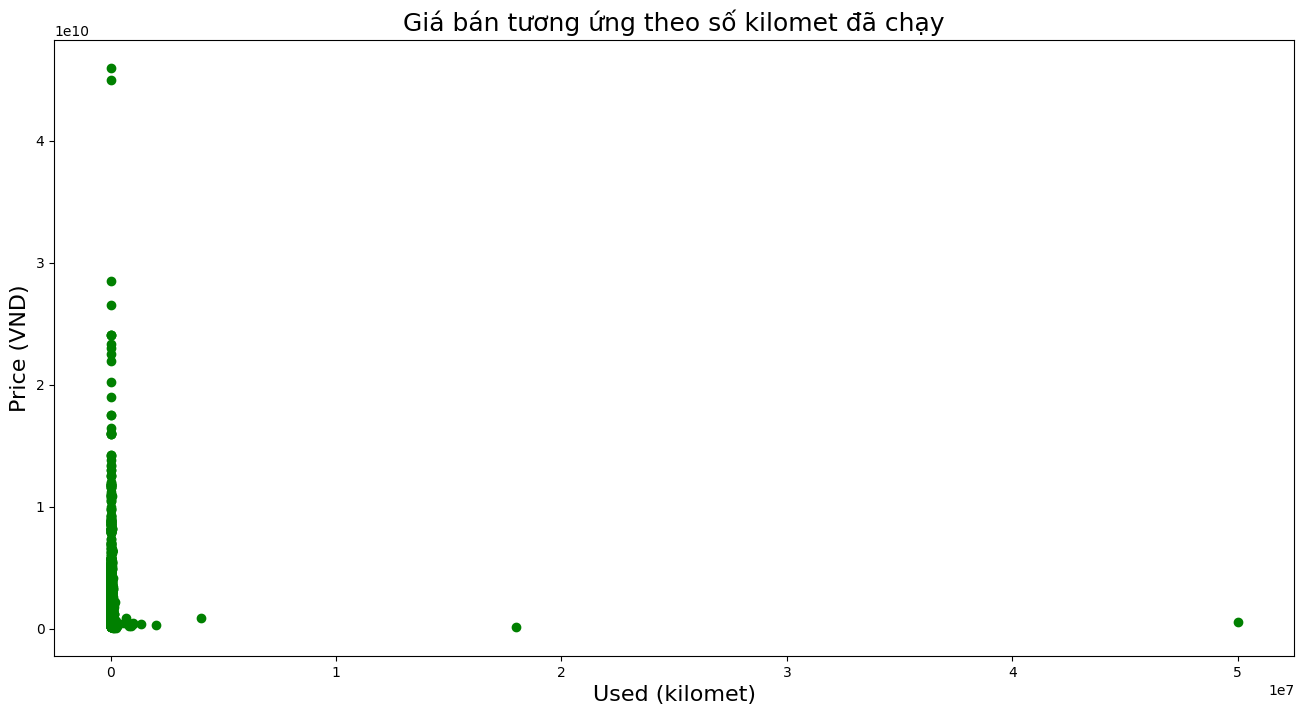

In [186]:

x = df['Used (kilomet)'].values
y = df['Price'].values

plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green', )
plt.xlabel('Used (kilomet)', fontsize=16)
plt.ylabel('Price (VND)', fontsize=16)
plt.title("Giá bán tương ứng theo số kilomet đã chạy", fontsize=18)

Encoding for 'New or Old' column

In [187]:

for i in range(df.shape[0]):
    if(df['New Or Old'][i] == 'Xe cũ <'):
        df['New Or Old'][i] = df['New Or Old'][i].replace('Xe cũ <', '0')
    elif (df['New Or Old'][i] == 'Xe cũ'):
        df['New Or Old'][i] = df['New Or Old'][i].replace('Xe cũ', '0')
    elif (df['New Or Old'][i] == 'Xe mới'):
        df['New Or Old'][i] = df['New Or Old'][i].replace('Xe mới', '1')

df['New Or Old'] = pd.to_numeric(df['New Or Old'], downcast='integer')

print(set(df['New Or Old']))


C:\Users\dongu\AppData\Local\Temp\ipykernel_8072\94067763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Or Old'][i] = df['New Or Old'][i].replace('Xe cũ', '0')
C:\Users\dongu\AppData\Local\Temp\ipykernel_8072\94067763.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Or Old'][i] = df['New Or Old'][i].replace('Xe mới', '1')


{0, 1}


Encoding for Production Origin column

In [188]:
print(set(df['Production Origin']))

{'Xe lắp ráp trong nước', 'Xe nhập khẩu'}


In [189]:
for i in range(df.shape[0]):
    if(df['Production Origin'][i] == 'Xe nhập khẩu'):
        df['Production Origin'][i] = df['Production Origin'][i].replace('Xe nhập khẩu', '0')
    elif (df['Production Origin'][i] == 'Xe lắp ráp trong nước'):
        df['Production Origin'][i] = df['Production Origin'][i].replace('Xe lắp ráp trong nước', '1')

df['Production Origin'] = pd.to_numeric(df['Production Origin'], downcast='integer')

print(set(df['Production Origin']))

C:\Users\dongu\AppData\Local\Temp\ipykernel_8072\1046299793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production Origin'][i] = df['Production Origin'][i].replace('Xe lắp ráp trong nước', '1')
C:\Users\dongu\AppData\Local\Temp\ipykernel_8072\1046299793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production Origin'][i] = df['Production Origin'][i].replace('Xe nhập khẩu', '0')


{0, 1}


Encoding for Car Gearbox column

In [190]:
print(set(df['Car Gearbox']))

{'số tay', 'số tự động'}


In [191]:
for i in range(df.shape[0]):
    if(df['Car Gearbox'][i] == 'số tự động'):
        df['Car Gearbox'][i] = df['Car Gearbox'][i].replace('số tự động', '1')
    elif (df['Car Gearbox'][i] == 'số tay'):
        df['Car Gearbox'][i] = df['Car Gearbox'][i].replace('số tay', '0')

df['Car Gearbox'] = pd.to_numeric(df['Car Gearbox'], downcast='integer')

print(set(df['Car Gearbox']))

C:\Users\dongu\AppData\Local\Temp\ipykernel_8072\1429376623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car Gearbox'][i] = df['Car Gearbox'][i].replace('số tự động', '1')
C:\Users\dongu\AppData\Local\Temp\ipykernel_8072\1429376623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car Gearbox'][i] = df['Car Gearbox'][i].replace('số tay', '0')


{0, 1}


In [192]:
df.head()

,Year,New Or Old,Address,Production Origin,Color,Car Gearbox,Used (kilomet),Company,Fuel Type,Machine Capacity (L) Random,Price
0,2015,0,Hà Nội,1,màu đỏ,1,60000,Mazda,máy xăng,2.5,5.200000e+08
1,2019,0,TP HCM,1,màu đỏ,1,15000,Mercedes,máy xăng,3.0,3.299000e+09
2,2022,1,TP HCM,1,màu cam,1,0,VinFast,xe điện,2.0,8.870000e+08
3,2018,0,Đồng Tháp,1,màu trắng,1,73000,Honda,máy xăng,1.5,4.180000e+08
4,2006,0,Đồng Tháp,1,màu bạc,0,138000,Ford,máy dầu,2.5,1.980000e+08


Encoding for Fuel Type column

In [193]:
print(set(df['Fuel Type']))

{'xe hybrid', 'máy dầu', 'máy xăng', 'xe điện'}


In [194]:
df.describe()

,Year,New Or Old,Production Origin,Car Gearbox,Used (kilomet),Machine Capacity (L) Random,Price
count,4279.000000,4279.000000,4279.000000,4279.000000,4.279000e+03,4279.000000,4.279000e+03
mean,2019.004440,0.348212,0.546623,0.906287,5.054223e+04,2.141762,1.442031e+09
std,4.104266,0.476459,0.497880,0.291464,8.163900e+05,0.831144,2.312841e+09
min,1990.000000,0.000000,0.000000,0.000000,0.000000e+00,0.800000,6.700000e+07
25%,2017.000000,0.000000,0.000000,1.000000,0.000000e+00,1.500000,5.500000e+08
50%,2020.000000,0.000000,1.000000,1.000000,2.000000e+04,2.000000,7.900000e+08
75%,2022.000000,1.000000,1.000000,1.000000,5.500000e+04,2.400000,1.288000e+09
max,2023.000000,1.000000,1.000000,1.000000,5.000000e+07,12.300000,4.600000e+10


# Làm thêm nha chứ chưa đủ, bản đủ lạc mất rồi :))